# Task 01 - Teoría

1. ¿Qué es el temporal difference learning y en qué se diferencia de los métodos tradicionales de aprendizaje supervisado? Explique el concepto de "error de diferencia temporal" y su papel en los algoritmos de aprendizaje por refuerzo


2. En el contexto de los juegos simultáneos, ¿cómo toman decisiones los jugadores sin conocer las acciones de sus oponentes? De un ejemplo de un escenario del mundo real que pueda modelarse como un juego simultáneo y discuta las estrategias que los jugadores podrían emplear en tal situación

3. ¿Qué distingue los juegos de suma cero de los juegos de suma cero y cómo afecta esta diferencia al proceso de toma de decisiones de los jugadores? Proporcione al menos un ejemplo de juegos que entren en la categoría de juegos de no suma cero y discuta las consideraciones estratégicas únicas involucradas

4. ¿Cómo se aplica el concepto de equilibrio de Nash a los juegos simultáneos? Explicar cómo el equilibrio de Nash representa una solución estable en la que ningún jugador tiene un incentivo para desviarse unilateralmente de la estrategia elegida

5. Discuta la aplicación del temporal difference learning en el modelado y optimización de procesos de toma de decisiones en entornos dinámicos. ¿Cómo maneja el temporal difference learning el equilibrio entre exploración y explotación y cuáles son algunos de los desafíos asociados con su implementación en la práctica?

# Task 02 - Connect Four

In [1]:
import numpy as np
import math
import random

In [2]:
# Constantes del juego

# Define el tamaño del tablero
CANT_FILAS = 6
CANT_COLUMNAS = 7

# Define el indice de los jugadores
JUGADOR = 0 
IA = 1

# Define las piezas de los jugadores
PIEZA_JUGADOR = 1
PIEZA_IA = 2

In [4]:
# Crea el tablero utilizando una matriz de 0s
def crearTablero():
    tablero = np.zeros((CANT_FILAS, CANT_COLUMNAS), dtype=int)
    return tablero

# Inserta la ficha en el tablero
def soltarFicha(tablero, fila, columna, pieza):
    tablero[fila][columna] = pieza

# Chequea si la columna es valida para soltar la ficha
def esValida(tablero, columna):
    return tablero[CANT_FILAS-1][columna] == 0

# Obtiene la siguiente fila vacia en la columna
def obtenerSiguienteFilaVacia(tablero, columna):
    for r in range(CANT_FILAS):
        if tablero[r][columna] == 0:
            return r

# Imprime el tablero
def imprimirTablero(tablero):
    tableroInvertido = np.flip(tablero, 0)
    filas, columnas = tableroInvertido.shape

    tableroInvertido = tableroInvertido.astype(int)

    for i in range(filas):
        print("|", end="")
        for j in range(columnas):
            print(f"{tableroInvertido[i,j]:2}", end=" |")
        print()
    
    print("-" * (columnas * 4))

    print("|", end=" ")
    for j in range(columnas):
        print(f"{j}", end=" | ")

# Chequea si alguien gano
def movimientoGanador(tablero, pieza):
    # Chequeo horizontal
    for i in range(CANT_COLUMNAS - 3):
        for j in range(CANT_FILAS):
            if tablero[j][i] == pieza and tablero[j][i+1] == pieza and tablero[j][i+2] == pieza and tablero[j][i+3] == pieza:
                return True
    
    # Chequeo vertical
    for i in range(CANT_COLUMNAS):
        for j in range(CANT_FILAS - 3):
            if tablero[j][i] == pieza and tablero[j+1][i] == pieza and tablero[j+2][i] == pieza and tablero[j+3][i] == pieza:
                return True
    
    # Chequeo diagonal positiva
    for i in range(CANT_COLUMNAS - 3):
        for j in range(CANT_FILAS - 3):
            if tablero[j][i] == pieza and tablero[j+1][i+1] == pieza and tablero[j+2][i+2] == pieza and tablero[j+3][i+3] == pieza:
                return True
    
    # Chequeo diagonal negativa
    for i in range(CANT_COLUMNAS - 3):
        for j in range(3, CANT_FILAS):
            if tablero[j][i] == pieza and tablero[j-1][i+1] == pieza and tablero[j-2][i+2] == pieza and tablero[j-3][i+3] == pieza:
                return True

    return False

# Obtiene una lista con las posiciones validas para soltar la ficha
def obtenerPosicionesValidas(tablero):
    posicionesValidas = []
    for i in range(CANT_COLUMNAS):
        if esValida(tablero, i):
            posicionesValidas.append(i)
    return posicionesValidas


In [5]:
class AGENTE_IA:
    def __init__(self, alfa_beta_poda):
        self.alfa_beta_poda = alfa_beta_poda
    
    def puntajePosicion(self, tablero, pieza):
        puntaje = 0
        piezaOponente = PIEZA_JUGADOR

        tableroDeEvaluacion = np.array([[3, 4, 5, 7, 5, 4, 3],
                                        [4, 6, 8, 10, 8, 6, 4],
                                        [5, 8, 11, 13, 11, 8, 5],
                                        [5, 8, 11, 13, 11, 8, 5],
                                        [4, 6, 8, 10, 8, 6, 4],
                                        [3, 4, 5, 7, 5, 4, 3]])
        
        puntajePieza = np.sum(tableroDeEvaluacion[tablero == pieza])
        puntajeOponente = np.sum(tableroDeEvaluacion[tablero == piezaOponente])
        
        puntaje = puntajePieza - puntajeOponente
        return puntaje

    def isTerminalNode(self, tablero):
        return movimientoGanador(tablero, PIEZA_JUGADOR) or movimientoGanador(tablero, PIEZA_IA) or len(obtenerPosicionesValidas(tablero)) == 0

    def minimax(self, tablero, maximizandoJugador, profundidad, alfa = None, beta = None):
        lugaresValidos = obtenerPosicionesValidas(tablero)
        esTerminal = self.isTerminalNode(tablero)
        
        if profundidad == 0 or esTerminal:
            if esTerminal:
                if movimientoGanador(tablero, PIEZA_IA):
                    return (None, math.inf)
                elif movimientoGanador(tablero, PIEZA_JUGADOR):
                    return (None, -math.inf)
                else:
                    return (None, 0)
            else:
                return (None, self.puntajePosicion(tablero, PIEZA_IA))
            
        if maximizandoJugador:
            valor = -math.inf
            columna = random.choice(lugaresValidos)
            for col in lugaresValidos:
                fila = obtenerSiguienteFilaVacia(tablero, col)
                tableroTemporal = tablero.copy()
                soltarFicha(tableroTemporal, fila, col, PIEZA_IA)
                nuevoValor = self.minimax(tableroTemporal, False, profundidad - 1, alfa, beta)[1]
                
                if nuevoValor > valor:
                    valor = nuevoValor
                    columna = col
                if self.alfa_beta_poda:  # Solo actualiza alfa y beta si alfa_beta_poda es True
                    alfa = max(alfa, valor)
                    if alfa >= beta:
                        break
            return columna, valor
        
        else:
            value = math.inf
            columna = random.choice(lugaresValidos)
            for col in lugaresValidos:
                fila = obtenerSiguienteFilaVacia(tablero, col)
                tableroTemporal = tablero.copy()
                soltarFicha(tableroTemporal, fila, col, PIEZA_JUGADOR)
                nuevoValor = self.minimax(tableroTemporal, True, profundidad - 1, alfa, beta)[1]
                
                if nuevoValor < value:
                    value = nuevoValor
                    columna = col
                if self.alfa_beta_poda:  # Solo actualiza alfa y beta si alfa_beta_poda es True
                    beta = min(beta, value)
                    if alfa >= beta:
                        break
            return columna, value

# IA vs IA

In [5]:
juegosGanados = [0, 0]

for i in range(10):
    # creamos el tablero
    tablero = crearTablero()

    # Inicializamos las variables del juego
    juegoTerminado = False
    turno = random.randint(JUGADOR, IA)
    jugadorHumano = False

    podaAlfaBetaIA01 = False
    profundidadIA1 = 2
    agente01 = AGENTE_IA(podaAlfaBetaIA01)

    podaAlfaBetaIA02 = True
    profundidadIA2 = 5
    agente02 = AGENTE_IA(podaAlfaBetaIA02)



    # Imprimimos el tablero
    imprimirTablero(tablero)
    print("\n")
    print(f"Juego {i+1}")
    
    while not juegoTerminado:
        if turno == JUGADOR:
            # Turno del jugador
            if jugadorHumano:
                print("---> Turno del Jugador <---")
                columna = int(input("Elije una columna (0-6): "))
                
                if esValida(tablero, columna):
                    fila = obtenerSiguienteFilaVacia(tablero, columna)
                    soltarFicha(tablero, fila, columna, PIEZA_JUGADOR)
                    if movimientoGanador(tablero, PIEZA_JUGADOR):
                        print("Ganaste!")
                        juegoTerminado = True
                        imprimirTablero(tablero)
                        break
                
                imprimirTablero(tablero)
                print("\n") 
                turno += 1
                turno = turno % 2

            else:
                print("---> Turno de la IA-01 <---")
                columna, puntaje = agente01.minimax(tablero, True, profundidadIA1, -math.inf, math.inf)
                if esValida(tablero, columna):
                    fila = obtenerSiguienteFilaVacia(tablero, columna)
                    soltarFicha(tablero, fila, columna, PIEZA_JUGADOR)
                    if movimientoGanador(tablero, PIEZA_JUGADOR):
                        print("Ganó la IA - 01!")
                        juegosGanados[0] = juegosGanados[0] + 1
                        juegoTerminado = True
                        imprimirTablero(tablero)
                        break
                    
                imprimirTablero(tablero)
                print("\n")
                turno += 1
                turno = turno % 2
                    
        else:
            # Turno de la IA
            print("---> Turno de la IA <---")
            columna, puntaje = agente02.minimax(tablero, True, profundidadIA2, -math.inf, math.inf)
            if esValida(tablero, columna):
                fila = obtenerSiguienteFilaVacia(tablero, columna)
                soltarFicha(tablero, fila, columna, PIEZA_IA)
                if movimientoGanador(tablero, PIEZA_IA):
                    print("Ganó la IA - 02!")
                    juegosGanados[1] = juegosGanados[1] + 1
                    juegoTerminado = True
                    imprimirTablero(tablero)
                    break
                
            imprimirTablero(tablero)
            print("\n")
            turno += 1
            turno = turno % 2
                
        
        if agente01.isTerminalNode(tablero) and agente02.isTerminalNode(tablero):
            print("Empate!")
            print("\n")
            imprimirTablero(tablero)
            juegoTerminado = True
            
print(juegosGanados)


| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

Juego 1
---> Turno de la IA <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno de la IA-01 <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno de la IA <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 0 | 2 | 0 | 0 | 0 |
-----------

# Humanos vs IA

In [11]:
# creamos el tablero
tablero = crearTablero()

# Inicializamos las variables del juego
juegoTerminado = False
turno = random.randint(JUGADOR, IA)
jugadorHumano = True

podaAlfaBetaIA01 = False
profundidadIA1 = 2
agente01 = AGENTE_IA(podaAlfaBetaIA01)

podaAlfaBetaIA02 = True
profundidadIA2 = 5
agente02 = AGENTE_IA(podaAlfaBetaIA02)



# Imprimimos el tablero
imprimirTablero(tablero)
print("\n")

while not juegoTerminado:
    if turno == JUGADOR:
        # Turno del jugador
        if jugadorHumano:
            print("---> Turno del Jugador <---")
            columna = int(input("Elije una columna (0-6): "))
            
            if esValida(tablero, columna):
                fila = obtenerSiguienteFilaVacia(tablero, columna)
                soltarFicha(tablero, fila, columna, PIEZA_JUGADOR)
                if movimientoGanador(tablero, PIEZA_JUGADOR):
                    print("Ganaste!")
                    juegoTerminado = True
                    imprimirTablero(tablero)
                    break
            
            imprimirTablero(tablero)
            print("\n") 
            turno += 1
            turno = turno % 2

        else:
            print("---> Turno de la IA-01 <---")
            columna, puntaje = agente01.minimax(tablero, True, profundidadIA1, -math.inf, math.inf)
            if esValida(tablero, columna):
                fila = obtenerSiguienteFilaVacia(tablero, columna)
                soltarFicha(tablero, fila, columna, PIEZA_JUGADOR)
                if movimientoGanador(tablero, PIEZA_JUGADOR):
                    print("Ganó la IA - 01!")
                    juegoTerminado = True
                    imprimirTablero(tablero)
                    break
                
            imprimirTablero(tablero)
            print("\n")
            turno += 1
            turno = turno % 2
                
    else:
        # Turno de la IA
        print("---> Turno de la IA <---")
        columna, puntaje = agente02.minimax(tablero, True, profundidadIA2, -math.inf, math.inf)
        if esValida(tablero, columna):
            fila = obtenerSiguienteFilaVacia(tablero, columna)
            soltarFicha(tablero, fila, columna, PIEZA_IA)
            if movimientoGanador(tablero, PIEZA_IA):
                print("Ganó la IA - 02!")
                juegoTerminado = True
                imprimirTablero(tablero)
                break
            
        imprimirTablero(tablero)
        print("\n")
        turno += 1
        turno = turno % 2
            
    
    if agente01.isTerminalNode(tablero) and agente02.isTerminalNode(tablero):
        print("Empate!")
        print("\n")
        imprimirTablero(tablero)
        juegoTerminado = True
            


| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno de la IA <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 0 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno del Jugador <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 1 | 0 | 0 | 0 | 0 |
----------------------------
| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 

---> Turno de la IA <---
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 0 | 0 | 0 | 0 | 0 |
| 0 | 2 | 1 | 0 | 0 | 0 | 0 |
-------------------

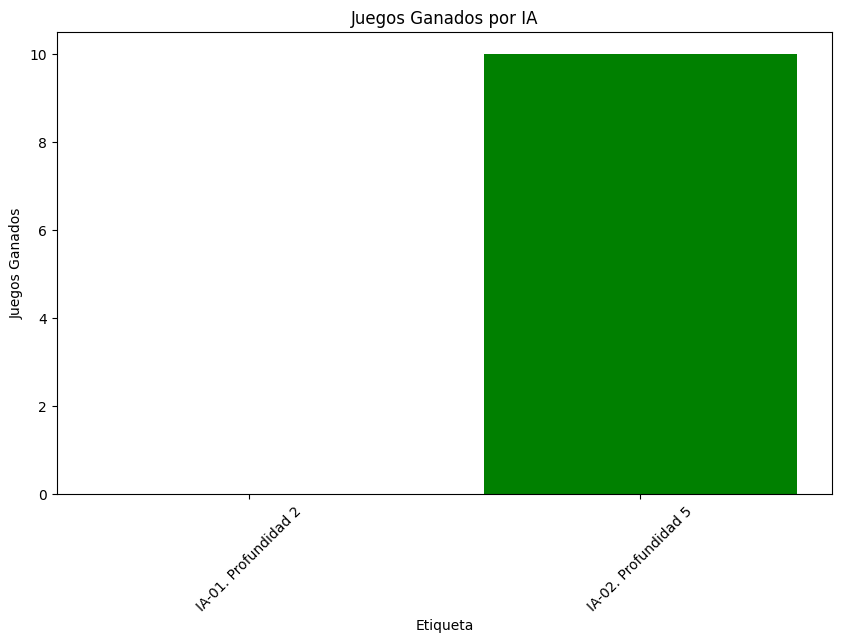

In [ ]:
import matplotlib.pyplot as plt

etiquetas = [f'IA-01. Profundidad {profundidadIA1}', f'IA-02. Profundidad {profundidadIA2}']

# Crear la gráfica
plt.figure(figsize=(10, 6))  # Tamaño opcional
plt.bar(etiquetas, juegosGanados, color=['blue', 'green'])  # Crear gráfico de barras con colores

plt.xlabel('Etiqueta')  # Etiqueta del eje X
plt.ylabel('Juegos Ganados')  # Etiqueta del eje Y
plt.title('Juegos Ganados por IA')  # Título de la gráfica
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor lectura

# Guardar la gráfica en un archivo
plt.savefig('juegos_ganados_por_ia.png', bbox_inches='tight')  # Guardar la imagen, ajustar el layout

# Mostrar la gráfica
plt.show()

# Referencias
### Codigo para la evaluacion de ganadores
https://www.youtube.com/watch?v=rbmk1qtVEmg
### Obtencion de la matriz de valores inicial
Chat Copilot - prompt:

        evaluation_board = np.array([[0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])
        Como asi?

Respuesta:

En el juego de Connect 4 (Conecta 4), las posiciones centrales suelen ser más valiosas porque ofrecen más oportunidades para conectar cuatro fichas. Por lo tanto, podríamos asignar valores más altos a las posiciones centrales y valores más bajos a las posiciones de los bordes. Aquí hay un ejemplo de cómo podrías hacerlo:

En este tablero de evaluación, las posiciones con valores más altos son más deseables para el jugador. Por supuesto, estos valores son solo sugerencias y podrías ajustarlos según tu estrategia de juego.

    evaluation_board = np.array([[3, 4, 5, 7, 5, 4, 3],
                             [4, 6, 8, 10, 8, 6, 4],
                             [5, 8, 11, 13, 11, 8, 5],
                             [5, 8, 11, 13, 11, 8, 5],
                             [4, 6, 8, 10, 8, 6, 4],
                             [3, 4, 5, 7, 5, 4, 3]])

# Link del video
https://youtu.be/GIugZYrOxII
# Link del Repo
https://github.com/angelcast2002/Lab06-IA.git